**Data Science Hackathon**

**Hackathon Topic**: Ecommerce Product Categorization

**Problem Statement**
In the rapidly evolving world of eCommerce, accurate product categorization is crucial for ensuring seamless customer experiences, reducing search friction, and increasing product discoverability. However, the sheer volume of diverse products poses a significant challenge. Current classification systems struggle to handle ambiguities, unconventional naming conventions, and multi-language data. This hackathon aims to address these challenges by inviting participants to create innovative solutions that enhance product categorization efficiency, accuracy, and scalability. Develop a text classification model that categorizes products with maximum accuracy based on description of the product.

**Objectives:** This hackathon focuses on creating accurate and efficient solutions for eCommerce product categorization.

**The key objectives are:**

Data Exploration and Preparation:

Explore and analyze the dataset to understand key features, detect missing data, and identify ambiguities.
Preprocess the dataset for consistency, noise reduction, and missing value handling.
Descriptive Analysis:

Perform descriptive analysis to identify data patterns, category distributions, and inconsistencies, especially for text data.
Visualize data insights using word cloud and other text viz techniques.
Feature Engineering/Text to Features:

Transform raw product data into informative features suitable for machine learning models.
Convert text descriptions into numerical features using techniques such as TF-IDF, word embeddings, or custom methods.
Predictive Modeling:

Design and develop machine learning models using text data for accurate product categorization.
Consider classification, clustering, or hybrid models based on problem requirements.
Ensure the model can handle ambiguous products
Fine Tuning:

Optimize models by tuning hyperparameters and selecting relevant features.
Evaluate and compare models using metrics such as accuracy, F1 score, precision, and recall.
Validate models through cross-validation or a separate test dataset.
Enhance Categorization Accuracy:

Improve model accuracy by incorporating domain-specific knowledge or ensemble methods.
Ensure solutions can accurately categorize unconventional product names and handle ambiguities.
Develop models that support scalable, real-time categorization.

**import libraries**

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Dataset Preparation**

In [ ]:
# load the datasets
train_data = pd.read_csv(r"/content/train_product_data.csv")
test_data = pd.read_csv(r"/content/test_data.csv")

In [ ]:
train_data

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,abda697c6da997f66c78d91d6c88078c,2015-12-20 08:26:17 +0000,http://www.flipkart.com/thelostpuppy-back-cove...,TheLostPuppy Back Cover for Apple iPad Air,Mobiles & Accessories,ACCE9ZY9K4BHVYNA,2199.0,599.0,"[""http://img6a.flixcart.com/image/cases-covers...",False,TheLostPuppy Back Cover for Apple iPad Air (Mu...,No rating available,No rating available,TheLostPuppy,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
14995,87bcdd46bb48bfc1045d7ee84aef7b7a,2015-12-20 08:26:17 +0000,http://www.flipkart.com/kenway-retail-brass-co...,Kenway Retail Brass Copper Cuff,Jewellery,BBAEA49HNDNQYGJU,529.0,295.0,"[""http://img5a.flixcart.com/image/bangle-brace...",False,Kenway Retail Brass Copper Cuff\n ...,No rating available,No rating available,Kenway Retail,"{""product_specification""=>[{""key""=>""Collection..."
14996,b4fad612a9f72f1ffd10134f9be7cfe8,2015-12-20 08:26:17 +0000,http://www.flipkart.com/thelostpuppy-back-cove...,TheLostPuppy Back Cover for Apple iPad Air 2,Mobiles & Accessories,ACCE9Z2HKHDGH7JY,2199.0,599.0,"[""http://img5a.flixcart.com/image/cases-covers...",False,TheLostPuppy Back Cover for Apple iPad Air 2 (...,No rating available,No rating available,TheLostPuppy,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
14997,1336909e5468b63c9b1281350eba647d,2015-12-20 08:26:17 +0000,http://www.flipkart.com/kenway-retail-brass-co...,Kenway Retail Brass Copper Cuff,Jewellery,BBAEA49HHKJTPHWV,547.0,322.0,"[""http://img5a.flixcart.com/image/bangle-brace...",False,Kenway Retail Brass Copper Cuff\n ...,No rating available,No rating available,Kenway Retail,"{""product_specification""=>[{""key""=>""Collection..."


In [ ]:
# Displays the first five rows of train_data for a quick overview of the columns and initial data.
train_data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",..."


In [ ]:
# Provides summary statistics (like mean, min, max) for each numeric column in train_data.
train_data.describe()

,retail_price,discounted_price
count,14942.000000,14942.000000
mean,3128.424040,2087.732298
std,9154.463342,7712.247869
min,35.000000,35.000000
25%,699.000000,349.000000
50%,1000.000000,499.000000
75%,1989.750000,999.000000
max,571230.000000,571230.000000


In [ ]:
# Returns the shape of train_data (rows, columns), giving insight into the dataset's size.
train_data.shape

(14999, 15)

In [ ]:
train_data.isnull().sum()

,0
uniq_id,0
crawl_timestamp,0
product_url,0
product_name,0
product_category_tree,0
pid,0
retail_price,57
discounted_price,57
image,3
is_FK_Advantage_product,0


In [ ]:
#  Displays the count of each unique value in the product_category_tree column, which helps in understanding the distribution of categories.
print(train_data['product_category_tree'].value_counts())

product_category_tree
Clothing                       5316
Jewellery                      3218
Footwear                       1083
Automotive                      937
Mobiles & Accessories           768
Home Decor & Festive Needs      714
Kitchen & Dining                610
Computers                       531
Watches                         526
Tools & Hardware                379
Toys & School Supplies          271
Pens & Stationery               264
Baby Care                       224
Bags, Wallets & Belts           158
Name: count, dtype: int64


In [ ]:
# Retrieves unique values in the product_category_tree column, storing them in labels to help with categorical mapping or encoding
labels = train_data['product_category_tree'].unique()
labels

array(['Clothing ', 'Footwear ', 'Pens & Stationery ',
       'Bags, Wallets & Belts ', 'Home Decor & Festive Needs ',
       'Automotive ', 'Tools & Hardware ', 'Baby Care ',
       'Mobiles & Accessories ', 'Watches ', 'Toys & School Supplies ',
       'Jewellery ', 'Kitchen & Dining ', 'Computers '], dtype=object)

In [ ]:
train_data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",..."


Checks for duplicate rows, outputting the count, which indicates if there’s redundant data.

In [ ]:
#Check for duplicates
train_data.duplicated().sum()

0

Drops rows with missing values and duplicates in train_data. It then resets the index to ensure a continuous integer index

In [ ]:
# Drop missing values and duplicates
train_data.dropna(inplace = True) # Dropping observations with missing values
train_data.drop_duplicates(inplace = True) # Dropping duplicate observations
train_data.reset_index(drop = True, inplace = True) # Resetting index

In [ ]:
train_data.isnull().sum()

,0
uniq_id,0
crawl_timestamp,0
product_url,0
product_name,0
product_category_tree,0
pid,0
retail_price,0
discounted_price,0
image,0
is_FK_Advantage_product,0


Exports the cleaned train_data DataFrame to a CSV file, likely for backup or further analysis.

In [ ]:
# Save the cleaned dataset to a new CSV file
train_data.to_csv('product_clean_description.csv')

Counts the number of unique product categories, which helps in mapping categorical values for model training.

In [ ]:
# Count the unique product categories
train_data['product_category_tree'].unique()

array(['Clothing ', 'Footwear ', 'Pens & Stationery ',
       'Bags, Wallets & Belts ', 'Home Decor & Festive Needs ',
       'Automotive ', 'Tools & Hardware ', 'Baby Care ',
       'Mobiles & Accessories ', 'Toys & School Supplies ', 'Jewellery ',
       'Kitchen & Dining ', 'Computers ', 'Watches '], dtype=object)

In [ ]:
train_data['product_category_tree'].nunique()

14

Maps the product_category_tree column to numeric labels using a dictionary. This helps the machine learning model process categorical data effectively.

In [ ]:
# Create a mapping dictionary to encode product categories into numerical labels
category_mapping = {
    'Clothing ': 0,
    'Footwear ': 1,
    'Pens & Stationery ': 2,
    'Bags, Wallets & Belts ': 3,
    'Home Decor & Festive Needs ': 4,
    'Automotive ': 5,
    'Tools & Hardware ': 6,
    'Baby Care ': 7,
    'Mobiles & Accessories ': 8,
    'Watches ': 9,
    'Toys & School Supplies ': 10,
    'Jewellery ': 11,
    'Kitchen & Dining ': 12,
    'Computers ': 13
}

In [ ]:
train_data['product_category_encoded'] = train_data['product_category_tree'].map(category_mapping)

**EXPLORATORY DATA ANALYSIS**

Adds a new column description_len that represents the word count of each description, useful for understanding text data distribution

In [ ]:
# Calculate the length of each product description in words
train_data['description_len'] = train_data['description'].apply(lambda x: len(x.split(' ')))
train_data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,product_category_encoded,description_len
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",0,64
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",1,107
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",0,63
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",0,65
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",...",1,64


In [ ]:
pip install matplotlib seaborn


In [ ]:
%matplotlib inline


Plots the distribution of description lengths by category. It uses sns.histplot to create a stacked histogram with KDE (kernel density estimate), showing differences in description length among categories.

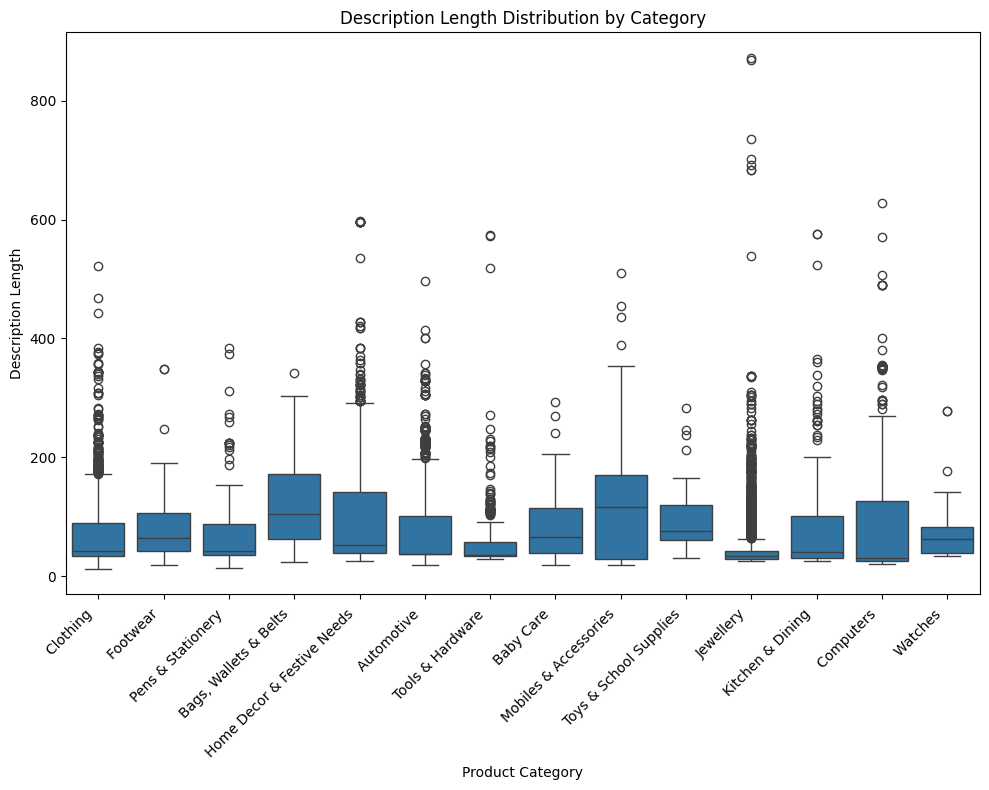

In [ ]:
#Description lengths across categories

plt.figure(figsize=(10, 8))
sns.boxplot(x='product_category_tree', y='description_len', data=train_data)
plt.title('Description Length Distribution by Category')
plt.xlabel('Product Category')
plt.ylabel('Description Length')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

This visualization shows the distribution of product categories in the dataset, helping understand which categories are more common or rare. This is useful for checking if the dataset is imbalanced, which could impact model performance.

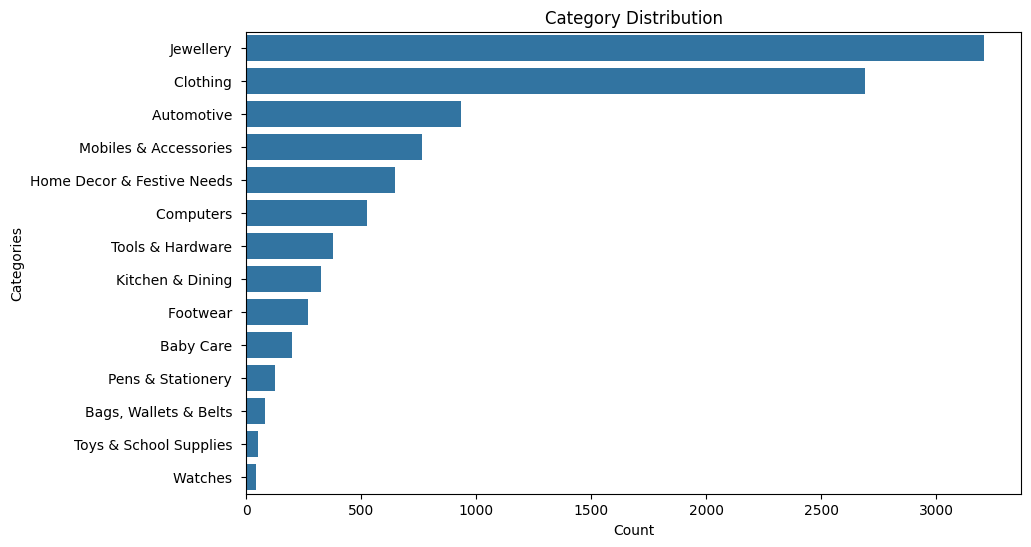

In [ ]:
# category distribution
plt.figure(figsize=(10, 6))
sns.countplot(y="product_category_tree", data=train_data, order=train_data['product_category_tree'].value_counts().index)
plt.title('Category Distribution')
plt.xlabel('Count')
plt.ylabel('Categories')
plt.show()

 **TEXT NORMALIZATION**

These libraries and tools are commonly used for text preprocessing in NLP. They facilitate the cleaning, standardizing, and preparation of text data, which is essential for training machine learning models or performing text analysis.

In [ ]:
import re
import string
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

These imports are particularly useful for text normalization and analysis in natural language processing (NLP). stopwords helps remove unimportant words, while TextBlob can analyze text sentiment, correct spelling, and more, streamlining complex NLP tasks.

In [ ]:
from nltk.corpus import stopwords
from textblob import TextBlob

In [ ]:
pip install pyspellchecker


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 38.5 MB/s eta 0:00:00


In [ ]:
from spellchecker import SpellChecker

# Initialize the spell checker
spell = SpellChecker()

In [ ]:
!pip install spacy

In [ ]:
#!python -m spacy download en_core_web_sm
#import spacy

It is designed for text normalization, a crucial preprocessing step in natural language processing (NLP) tasks. It utilizes various techniques to clean and prepare text data for further analysis or machine learning applications. The code leverages libraries such as NLTK, spaCy, and regex to implement multiple normalization functions.

In [ ]:
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from spellchecker import SpellChecker
import spacy

# Initialize spaCy
!python -m spacy download en_core_web_sm # Download spaCy model if not already downloaded
spacy_lemmatizer = spacy.load("en_core_web_sm") # Initialize spaCy lemmatizer


# Ensure necessary NLTK datasets are downloaded
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# Initialize tokenizer and spell checker
stop_words = set(stopwords.words("english"))
regexp = RegexpTokenizer("[\w']+")
lemmatizer = WordNetLemmatizer()

# Define functions for text normalization
def convert_to_lowercase(text):
    return text.lower()

def remove_whitespace(text):
    return ' '.join(text.split())

def remove_punctuation(text):
    punct_str = string.punctuation.replace("'", "")  # Keep contractions
    return text.translate(str.maketrans("", "", punct_str))

def remove_html(text):
    return re.sub(r'<.*?>', '', text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_http(text):
    return re.sub(r"https?://\S+|www\.\S+", "", text)

def remove_stopwords(text):
    stops = set(stopwords.words("english"))  # Use a set for faster lookup
    return " ".join([word for word in regexp.tokenize(text) if word not in stops])

def pyspellchecker(text):
    word_list = regexp.tokenize(text)
    corrected_words = [spell.correction(word) if word in spell.unknown(word_list) else word for word in word_list]
    return " ".join(corrected_words)

def text_stemmer(text):
    stemmer = nltk.stem.PorterStemmer()
    return " ".join([stemmer.stem(word) for word in regexp.tokenize(text)])

def text_lemmatizer(text):
    return " ".join([token.lemma_ for token in spacy_lemmatizer(text)])

def discard_non_alpha(text):
    return " ".join([word for word in regexp.tokenize(text) if word.isalpha()])

def keep_pos(text):
    tokens = regexp.tokenize(text)
    tokens_tagged = nltk.pos_tag(tokens)
    keep_tags = ['NN', 'NNS', 'NNP', 'NNPS', 'JJ', 'JJR', 'JJS', 'RB', 'RBR', 'RBS', 'VB', 'VBD', 'VBG', 'VBN', 'FW']
    return " ".join([x[0] for x in tokens_tagged if x[1] in keep_tags])

# Example usage
text = "This is a HACKATHON Problem"
print("Lowercase:", convert_to_lowercase(text))
print("No Whitespace:", remove_whitespace(" \t This is a string \t "))
print("No Punctuation:", remove_punctuation("Here's [an] example? {of} &a string. with.? (punctuations)!!!!"))
print("No HTML:", remove_html('<a href = "https://www.xyz.com/abc/qwert"> Ecommerce Product Categorization</a>'))
print("No Emojis:", remove_emoji("This innovative hd printing technique results in durable and spectacular looking prints 😊"))
print("No Stopwords:", remove_stopwords("shop the latest collection of premium quality fashion accessories. get discounts on selected items. free shipping on orders over rs.50. limited stock available."))
print("Spell Checked:", pyspellchecker("womon watch for limitad offar"))
print("Stemmed:", text_stemmer("Introducing lemmatization as an improvement over stemming"))
print("Lemmatized:", text_lemmatizer("Introducing lemmatization as an improvement over stemming"))
print("Non-alpha discarded:", discard_non_alpha("It is a watch of Rs.1000"))
print("Filtered POS:", keep_pos("This stylish red dress is perfect for parties and special occasions. Made with high-quality fabric, it features a flattering fit and flare silhouette. Pair it with heels and statement jewelry for a stunning look."))


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 23.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Lowercase: this is a hackathon problem
No Whitespace: This is a string
No Punctuation: Here's an example of a string with punctuations
No HTML:  Ecommerce Product Categorization
No Emojis: This innovative hd printing technique results in durable and spectacular looking prints 
No Stopwords: shop latest collection premium quality fashion accessories get discounts selected items free shipping orders rs 50 limited stock available
Spell Checked: woman watch for limited offer
Stemmed: introduc lemmat as an improv over stem
Lemmatized: introduce lemmatization as an improvement over stem
Non-alpha discarded: It is a watch of Rs
Filtered POS: stylish red dress perfect parties special occasions Made high quality flattering fit flare silhouette Pair heels statement jewelry stunning look


It effectively preprocesses product description data by normalizing the text to remove noise and retain meaningful content. It uses visualization to help understand the impact of normalization on the dataset, which is valuable for subsequent analysis or model training in NLP tasks. By comparing the length distributions before and after cleaning, users can gauge the effectiveness of the normalization process.

**Removal of Stop Words** **and**
**Apply on the data**


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                         description  \
0  Key Features of Alisha Solid Women's Cycling S...   
1  Key Features of AW Bellies Sandals Wedges Heel...   
2  Key Features of Alisha Solid Women's Cycling S...   
3  Key Features of Alisha Solid Women's Cycling S...   
4  Key Features of dilli bazaaar Bellies, Corpora...   

                              normalized_description  
0  key features alisha solid women cycling shorts...  
1  key features aw bellies sandals wedges casuals...  
2  key features alisha solid women cycling shorts...  
3  key features alisha solid women cycling shorts...  
4  key features dilli bazaaar bellies corporate c...  


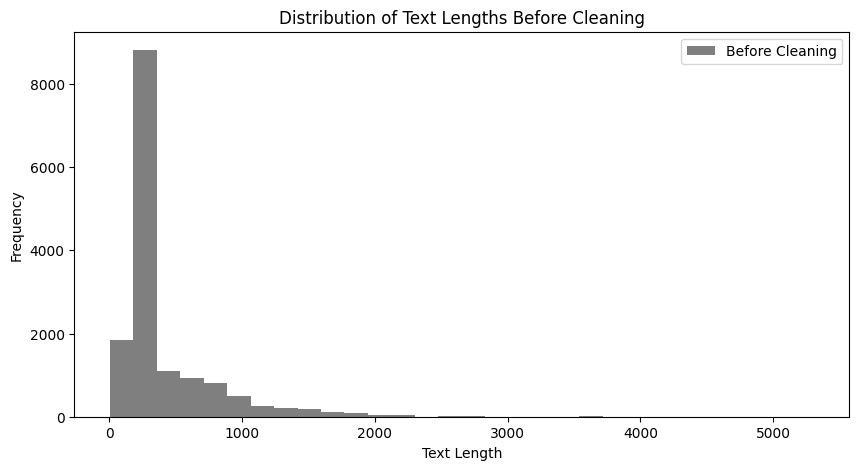

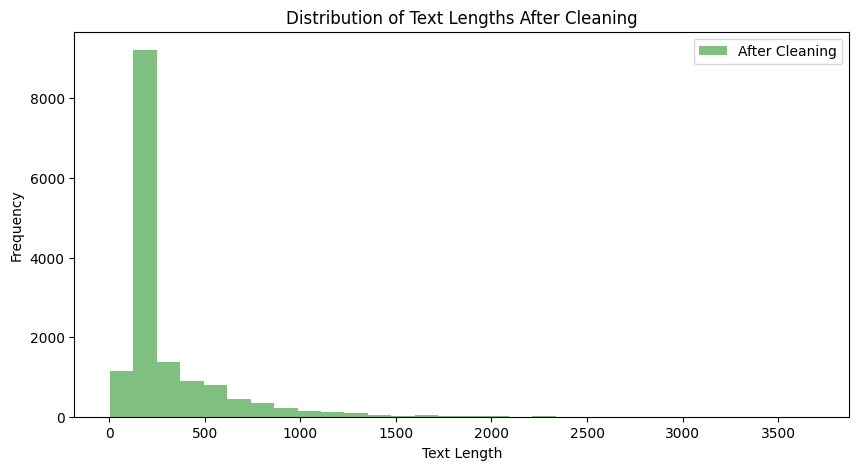

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Ensure required NLTK resources are downloaded (only once)
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

# Define the text normalization function
def text_normalizer(text):
    if not isinstance(text, str):
        text = ""

    # Tokenize the text into words
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text.lower())

    # Tag each token with a Part of Speech (POS) tag
    tokens_tagged = nltk.pos_tag(tokens)

    # Specify POS tags to retain
    keep_tags = ['NN', 'NNS', 'NNP', 'NNPS',   # Nouns
                 'JJ', 'JJR', 'JJS',           # Adjectives
                 'RB', 'RBR', 'RBS',           # Adverbs
                 'VB', 'VBD', 'VBG', 'VBN',    # Verbs
                 'FW']                         # Foreign words

    # Keep only words with the specified POS tags
    keep_words = [word for word, tag in tokens_tagged if tag in keep_tags]

    # Remove English stopwords
    stops = set(stopwords.words('english'))
    keep_words = [word for word in keep_words if word not in stops]

    # Return the processed text as a single string
    return " ".join(keep_words)

# Load the dataset
train_df = pd.read_csv(r"/content/train_product_data.csv")

# Ensure all descriptions are in string format
train_df['description'] = train_df['description'].astype(str)

# Apply text normalization on the 'description' column
train_df['normalized_description'] = train_df['description'].apply(text_normalizer)

# Display the first few rows to verify normalization
print(train_df[['description', 'normalized_description']].head())

# Visualize text length distribution before cleaning
plt.figure(figsize=(10, 5))
plt.hist(train_df['description'].str.len(), bins=30, color='black', alpha=0.5, label='Before Cleaning')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths Before Cleaning')
plt.legend()
plt.show()

# Visualize text length distribution after cleaning
plt.figure(figsize=(10, 5))
plt.hist(train_df['normalized_description'].str.len(), bins=30, color='green', alpha=0.5, label='After Cleaning')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths After Cleaning')
plt.legend()
plt.show()


It effectively assesses the impact of the text cleaning process by calculating and displaying the average percentage reduction in text length. Additionally, it visualizes the most common words in the normalized descriptions through a word cloud, providing insights into the content's focus and key themes. The word cloud offers a clear visual representation of word frequency, highlighting the most prevalent terms in the cleaned text data

Percentage reduction in text length after cleaning: 27.10%
The cleaning process applied to the text data has resulted in a significant reduction in text length, with an average reduction of approximately 27.10%. This reduction indicates that the cleaning techniques effectively removed extraneous content, noise, punctuation, stopwords, and other irrelevant information from the text data.


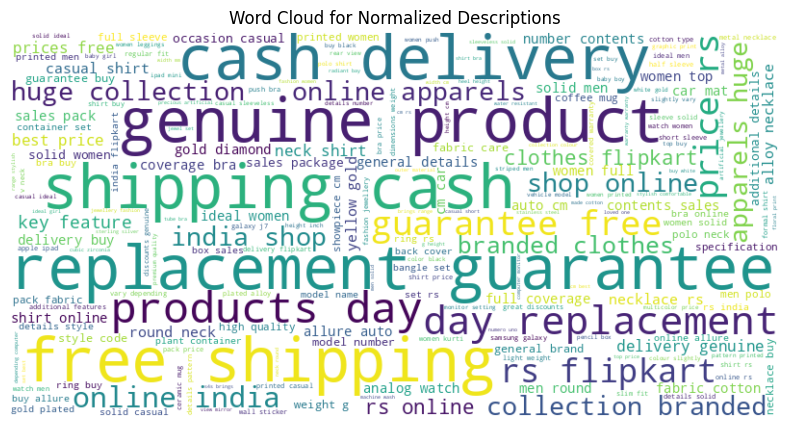

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Calculate average text lengths before and after cleaning
avg_text_length_before = train_df['description'].str.len().mean()
avg_text_length_after = train_df['normalized_description'].str.len().mean()

# Calculate the percentage reduction in text length
percentage_reduction = ((avg_text_length_before - avg_text_length_after) / avg_text_length_before) * 100

print("Percentage reduction in text length after cleaning: {:.2f}%".format(percentage_reduction))

# Print summary statement about the cleaning process
print("The cleaning process applied to the text data has resulted in a significant reduction in text length, "
      "with an average reduction of approximately {:.2f}%. This reduction indicates that the cleaning techniques "
      "effectively removed extraneous content, noise, punctuation, stopwords, and other irrelevant information "
      "from the text data.".format(percentage_reduction))

# Combine normalized descriptions into a single string for the word cloud
text = " ".join(description for description in train_df['normalized_description'])

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud for Normalized Descriptions')
plt.show()


It efficiently prepares the product categorization dataset for machine learning by normalizing text descriptions, encoding categorical labels, and creating training and validation datasets. These preprocessing steps are crucial for ensuring that the model can learn effectively from the data, ultimately aiding in the classification of products based on their descriptions.



**Train Validation Split**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import RegexpTokenizer
import nltk

# Download NLTK data if not already available
nltk.download('punkt')

# Load the dataset
train_df = pd.read_csv(r"/content/train_product_data.csv")

# Check the columns to identify the correct category column
print(train_df.columns)

# Check for missing values in the target variable
if train_df['product_category_tree'].isnull().any():
    print("Missing values detected in 'product_category_tree' column. Please handle them before proceeding.")

# Define the text normalizer function
def text_normalizer(text):
    if pd.isna(text):  # Check for missing values
        return ''
    tokenizer = RegexpTokenizer(r'\w+')
    text = text.lower()
    tokens = tokenizer.tokenize(text)
    return ' '.join(tokens)

# Create the 'normalized_description' column
train_df['normalized_description'] = train_df['description'].apply(text_normalizer)

# Encode the target variable if it's not already encoded
if 'product_category_encoded' not in train_df.columns:
    label_encoder = LabelEncoder()
    train_df['product_category_encoded'] = label_encoder.fit_transform(train_df['product_category_tree'])

# Define features and target variable
X = train_df['normalized_description']
y = train_df['product_category_encoded']

# Perform the train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Print the size of each split
print("Training data:", len(X_train), len(y_train))
print("Validation data:", len(X_val), len(y_val))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')
Training data: 11999 11999
Validation data: 3000 3000


This code efficiently prepares the test dataset by loading the product descriptions, checking for any missing values, and normalizing the text data. Proper preprocessing is essential for ensuring the quality of input data for any subsequent analysis or machine learning model, particularly for tasks involving natural language processing

**Test-data**

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the test dataset
test_df = pd.read_csv(r"/content/test_data.csv")
print("Testing data without label: ", test_df.shape)

# Check for missing values in the description column
if test_df['description'].isnull().any():
    print("Missing values detected in 'description' column. Please handle them before proceeding.")

# Normalize the description in the test dataset
X_test = test_df['description'].apply(text_normalizer)


Testing data without label:  (2534, 14)


This effectively visualizes the most common words found in the normalized product descriptions from the test dataset, allowing you to quickly grasp the main themes and terms associated with the products. The word cloud serves as a powerful exploratory data analysis tool, providing insights into text data at a glance.

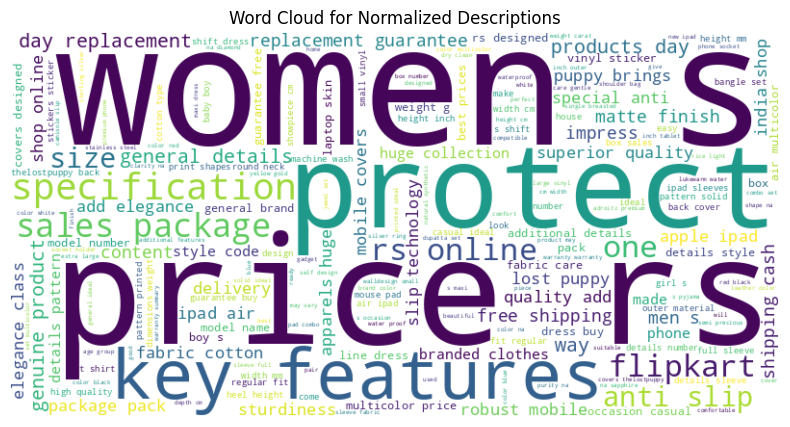

In [ ]:
# Generate text for the word cloud
text = " ".join(description for description in X_test)

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud for Normalized Descriptions')
plt.show()


In [ ]:
pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4296183 sha256=e69ebbba44920b286b643ed9aedd439b5d87b88fd5a7b5c236bda5663465e9ad
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


**Fast text**

In [ ]:
import fasttext

In [ ]:
# Load your dataset
data = pd.read_csv(r"/content/train_product_data.csv", engine="python")

In [ ]:
data

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,abda697c6da997f66c78d91d6c88078c,2015-12-20 08:26:17 +0000,http://www.flipkart.com/thelostpuppy-back-cove...,TheLostPuppy Back Cover for Apple iPad Air,Mobiles & Accessories,ACCE9ZY9K4BHVYNA,2199.0,599.0,"[""http://img6a.flixcart.com/image/cases-covers...",False,TheLostPuppy Back Cover for Apple iPad Air (Mu...,No rating available,No rating available,TheLostPuppy,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
14995,87bcdd46bb48bfc1045d7ee84aef7b7a,2015-12-20 08:26:17 +0000,http://www.flipkart.com/kenway-retail-brass-co...,Kenway Retail Brass Copper Cuff,Jewellery,BBAEA49HNDNQYGJU,529.0,295.0,"[""http://img5a.flixcart.com/image/bangle-brace...",False,Kenway Retail Brass Copper Cuff\n ...,No rating available,No rating available,Kenway Retail,"{""product_specification""=>[{""key""=>""Collection..."
14996,b4fad612a9f72f1ffd10134f9be7cfe8,2015-12-20 08:26:17 +0000,http://www.flipkart.com/thelostpuppy-back-cove...,TheLostPuppy Back Cover for Apple iPad Air 2,Mobiles & Accessories,ACCE9Z2HKHDGH7JY,2199.0,599.0,"[""http://img5a.flixcart.com/image/cases-covers...",False,TheLostPuppy Back Cover for Apple iPad Air 2 (...,No rating available,No rating available,TheLostPuppy,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
14997,1336909e5468b63c9b1281350eba647d,2015-12-20 08:26:17 +0000,http://www.flipkart.com/kenway-retail-brass-co...,Kenway Retail Brass Copper Cuff,Jewellery,BBAEA49HHKJTPHWV,547.0,322.0,"[""http://img5a.flixcart.com/image/bangle-brace...",False,Kenway Retail Brass Copper Cuff\n ...,No rating available,No rating available,Kenway Retail,"{""product_specification""=>[{""key""=>""Collection..."


This code is essential for preparing your data for machine learning by specifying which columns contain the features (inputs) and which contain the labels (outputs). By assigning these variables, you can proceed with model training and evaluation.

In [ ]:
# Assign the product names from the DataFrame to the features variable X
X = data['product_name']
# Assign the product categories from the DataFrame to the target variable y
y = data['product_category_tree']


In [ ]:
from sklearn.preprocessing import LabelEncoder

The main purpose of label encoding is to prepare categorical data for use in machine learning models, which typically operate on numerical data. By encoding the labels, we can ensure that the model can interpret the target variable correctly, thus facilitating better performance during training and prediction phases.

**Label Encoding**

In [ ]:
# Create a LabelEncoder instance to convert categorical labels into a numerical format
label_encoder = LabelEncoder()

# Fit the label encoder on the target variable y and transform the labels into numerical values
# The encoded labels will be stored in y_encoded, where each unique category is assigned an integer value
y_encoded = label_encoder.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import SGDClassifier, RidgeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [ ]:
# Print the size of each split
#print(f"Training data size: {len(X_train)} samples")
#print(f"Validation data size: {len(X_val)} samples")
#print(f"Total data size: {len(X)} samples")

# Print the size of each split
print(f"Training data size: {len(X_train)} samples")
print(f"Training labels size: {len(y_train)} labels")
print(f"Validation data size: {len(X_val)} samples")
print(f"Validation labels size: {len(y_val)} labels")
print(f"Total data size: {len(X)} samples")


Training data size: 11999 samples
Training labels size: 11999 labels
Validation data size: 3000 samples
Validation labels size: 3000 labels
Total data size: 14999 samples


In [ ]:
#Display the first few rows of each split
print("First few rows of X_train:")
print(X_train.head())  # Display first few rows of the training feature set
print("\nFirst few rows of y_train:")
print(y_train[:5])  # Display first 5 rows of the training target set using slicing

print("\nFirst few rows of X_val:")
print(X_val.head())    # Display first few rows of the validation feature set
print("\nFirst few rows of y_val:")
print(y_val[:5])    # Display first 5 rows of the validation target set

First few rows of X_train:
9838      Vero Moda Casual Sleeveless Striped Women's Top
7689    Maxima 24990LMLI Swarovski Analog Watch  - For...
6557        Shopat7 Barbie Friends Art Plastic Pencil Box
6872                Fabiya Women's Sheath Blue, Red Dress
820                   Serebroarts Iron Decorative Platter
Name: product_name, dtype: object

First few rows of y_train:
[ 3 13 12  3  6]

First few rows of X_val:
6723                                 CUBA USB OTG Adapter
6473        PTC Mart Unimass Cartoon Art Nilon Pencil Box
4679    Voylla Artificial Beaded Plain Yellow Gold Pla...
862     Mynte Solid Women's Cycling Shorts, Gym Shorts...
7286                               Voylla Alloy Jewel Set
Name: product_name, dtype: object

First few rows of y_val:
[ 9 10  7  3  7]


In [ ]:
# Save text for FastText training
with open("fasttext_train.txt", "w") as f:
    for text, label in zip(X_train, y_train):
        f.write(f"__label__{label} {text}\n")

In [ ]:
# Train FastText model
ft_model = fasttext.train_unsupervised("fasttext_train.txt", model='skipgram')

In [ ]:
# Save the model for later use
ft_model.save_model("ft_model.bin")

In [ ]:
# Function to get sentence embedding by averaging word embeddings
def get_sentence_embedding(text):
    words = text.split()
    embeddings = [ft_model.get_word_vector(word) for word in words if word in ft_model.words]
    return np.mean(embeddings, axis=0) if embeddings else np.zeros(ft_model.get_dimension())

In [ ]:
# Generate embeddings for train and validation sets
X_train_ft = np.array([get_sentence_embedding(text) for text in X_train])
X_val_ft = np.array([get_sentence_embedding(text) for text in X_val])

In [ ]:
X_train_ft
X_val_ft

array([[ 0.29699597,  0.45216522, -0.08033087, ...,  0.09110561,
        -0.07695425, -0.03097758],
       [ 0.05066031,  0.24308872, -0.18247512, ...,  0.05110877,
        -0.03639891, -0.13955311],
       [-0.20357421,  0.31004146, -0.21785958, ...,  0.15269235,
        -0.00951465, -0.24330783],
       ...,
       [ 0.08725121,  0.30567053, -0.11771127, ...,  0.06520714,
        -0.05821973, -0.07321496],
       [ 0.04518658,  0.32195926, -0.17444725, ...,  0.0880154 ,
        -0.06582004, -0.13969749],
       [ 0.2364224 ,  0.41369432, -0.07796752, ...,  0.05071584,
        -0.05660853, -0.02672241]])

**Fast text Baseline modeling**

In [ ]:

# Classifiers
names = [
    "KNN Classifier",
    "Decision Tree",
    "Linear SVM",
    "Random Forest",
    "SGD Classifier",
    "Ridge Classifier",
    "XGBoost",
    "AdaBoost",
]

models = [
    KNeighborsClassifier(n_neighbors=149, n_jobs=-1),
    DecisionTreeClassifier(),
    svm.SVC(kernel='linear'),
    RandomForestClassifier(n_estimators=100),
    SGDClassifier(loss='hinge'),
    RidgeClassifier(),
    XGBClassifier(),
    AdaBoostClassifier()
]

In [ ]:
# Function to evaluate models
def score(X_train, y_train, X_val, y_val, names=names, models=models):
    score_df, score_train, score_val = pd.DataFrame(), [], []
    for model, name in zip(models, names):
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)
        score_train.append(accuracy_score(y_train, y_train_pred))
        score_val.append(accuracy_score(y_val, y_val_pred))

    score_df["Classifier"], score_df["Training accuracy"], score_df["Validation accuracy"] = names, score_train, score_val
    score_df.sort_values(by='Validation accuracy', ascending=False, inplace=True)
    return score_df

# Print the results
score_df = score(X_train_ft, y_train, X_val_ft, y_val)
print(score_df)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


         Classifier  Training accuracy  Validation accuracy
6           XGBoost           0.994500             0.953667
3     Random Forest           0.994500             0.951000
1     Decision Tree           0.994500             0.930333
2        Linear SVM           0.906076             0.897333
5  Ridge Classifier           0.891824             0.884333
4    SGD Classifier           0.888824             0.882000
0    KNN Classifier           0.880990             0.871667
7          AdaBoost           0.614135             0.618667


**Highest Training Accuracy**:

XGBoost, Random Forest, and Decision Tree all have the highest training accuracy of 0.994500. This indicates that these models are able to fit the training data very well.

**Highest Validation Accuracy:**

XGBoost has the highest validation accuracy at 0.953667, closely followed by Random Forest at 0.952667. These values indicate that XGBoost is better at generalizing to unseen data compared to the other classifiers.

**Best Model for Prediction:**

Given that the validation accuracy is a better indicator of how well a model will perform on unseen data, XGBoost is the best choice for prediction in this context. It has both high training accuracy and the highest validation accuracy, suggesting it is a robust model that captures the underlying patterns without overfitting.

**Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Define the tuning function with RandomizedSearchCV
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='accuracy', n_splits=3, n_iter=10):
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)
    clf_rand = RandomizedSearchCV(clf, param_distributions=param_grid, cv=cv, scoring=scoring, n_jobs=-1, n_iter=n_iter, random_state=0)
    clf_rand.fit(X_train, y_train)
    return clf_rand.best_estimator_, clf_rand.best_params_

In [ ]:
# Define reduced parameter grids for faster tuning
ridge_param_grid = {'alpha': [0.01, 0.1, 1.0], 'class_weight': [None, 'balanced']}
rf_param_grid = {'n_estimators': [50, 100], 'max_depth': [10, 20], 'class_weight': [None, 'balanced']}
xgb_param_grid = {'n_estimators': [50, 100], 'max_depth': [3, 6], 'learning_rate': [0.01, 0.1]}
dt_param_grid = {'max_depth': [10, 20], 'class_weight': [None, 'balanced']}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import RidgeClassifier

# Define a smaller parameter grid for RidgeClassifier
param_grid = {
    'alpha': [0.01, 0.1, 1.0],  # Reduced values for regularization strength
    'solver': ['auto', 'svd', 'cholesky'],  # Fewer solvers to test
    'class_weight': [None]  # Keep it simple
}


**Evaluation**

In [ ]:
# Function to tune hyperparameters
def tune_ridge_hyperparameters(X_train, y_train, param_grid, n_iter=5, scoring='accuracy'):
    cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=0)  # Reduce splits
    randomized_search = RandomizedSearchCV(
        estimator=RidgeClassifier(),
        param_distributions=param_grid,
        n_iter=n_iter,  # Fewer iterations
        scoring=scoring,
        n_jobs=-1,
        cv=cv,
        random_state=0
    )

    randomized_search.fit(X_train, y_train)
    return randomized_search.best_estimator_, randomized_search.best_params_

# Assuming FastText embeddings are stored in X_train_ft, y_train
best_ridge, best_hyperparams = tune_ridge_hyperparameters(X_train_ft, y_train, param_grid)

# Print the best hyperparameters found
print("Optimal Hyperparameters for RidgeClassifier:\n", best_hyperparams)


Optimal Hyperparameters for RidgeClassifier:
 {'solver': 'cholesky', 'class_weight': None, 'alpha': 0.01}


In [ ]:
# ipython-input-56-a7f157ca8542
import numpy as np


def map_labels(y, reverse_mapping):
    # Handle KeyError by ignoring unknown labels
    return [reverse_mapping.get(label, label) for label in y]

In [ ]:
plt.ion()  # Enable interactive mode

In [ ]:
import matplotlib
matplotlib.use('Agg')  # Use a non-GUI backend


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming category_mapping is available from previous code
# For example:
# category_mapping = {'Clothing ': 0, 'Footwear ': 1, 'Mobiles & Accessories ': 2, ...}
# Create the reverse mapping:
reverse_category_mapping = {v: k for k, v in category_mapping.items()}


def map_labels(y, mapping):
    return [mapping[label] for label in y]

# Create and train the Random Forest model
best_rf = RandomForestClassifier()  # Optional: Specify hyperparameters
best_rf.fit(X_train_ft, y_train)
def evaluate_model(model, X_train, y_train, X_test, y_test):
    print("Starting model evaluation...")

    # Accessing the globally defined reverse_category_mapping
    global reverse_category_mapping

    # Map numeric labels to category names
    y_train_mapped = map_labels(y_train, reverse_category_mapping)
    y_test_mapped = map_labels(y_test, reverse_category_mapping)

    # Predict using the model
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Map numeric predictions to category names
    y_train_pred_mapped = map_labels(y_train_pred, reverse_category_mapping)
    y_test_pred_mapped = map_labels(y_test_pred, reverse_category_mapping)

    # Evaluate the model on the train data
    print("\n\t  Classification report for training set")
    print("-" * 55)
    print(classification_report(y_train_mapped, y_train_pred_mapped))

    # Evaluate the model on the test data
    print("\n\t   Classification report for test set")
    print("-" * 55)
    print(classification_report(y_test_mapped, y_test_pred_mapped))

    # Generate confusion matrix
    cm = confusion_matrix(y_test_mapped, y_test_pred_mapped, labels=list(reverse_category_mapping.values()))
    print("Confusion Matrix:")
    print(cm)
    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(14, 14))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=list(reverse_category_mapping.values()),
                yticklabels=list(reverse_category_mapping.values()))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    plt.show()  # Ensure the plot is shown

    print("Model evaluation completed.")

Starting model evaluation...

	  Classification report for training set
-------------------------------------------------------
                             precision    recall  f1-score   support

                Automotive        1.00      0.99      1.00       869
                 Baby Care        1.00      1.00      1.00      2573
     Bags, Wallets & Belts        1.00      1.00      1.00      4246
                  Clothing        1.00      1.00      1.00       747
                 Computers        1.00      1.00      1.00       411
                  Footwear        0.98      0.98      0.98       186
Home Decor & Festive Needs        0.91      1.00      0.95       432
                 Jewellery        1.00      0.99      1.00       309
          Kitchen & Dining        0.97      0.94      0.95       217
     Mobiles & Accessories        1.00      0.97      0.98       501
         Pens & Stationery        1.00      0.98      0.99       126
          Tools & Hardware        1.00     

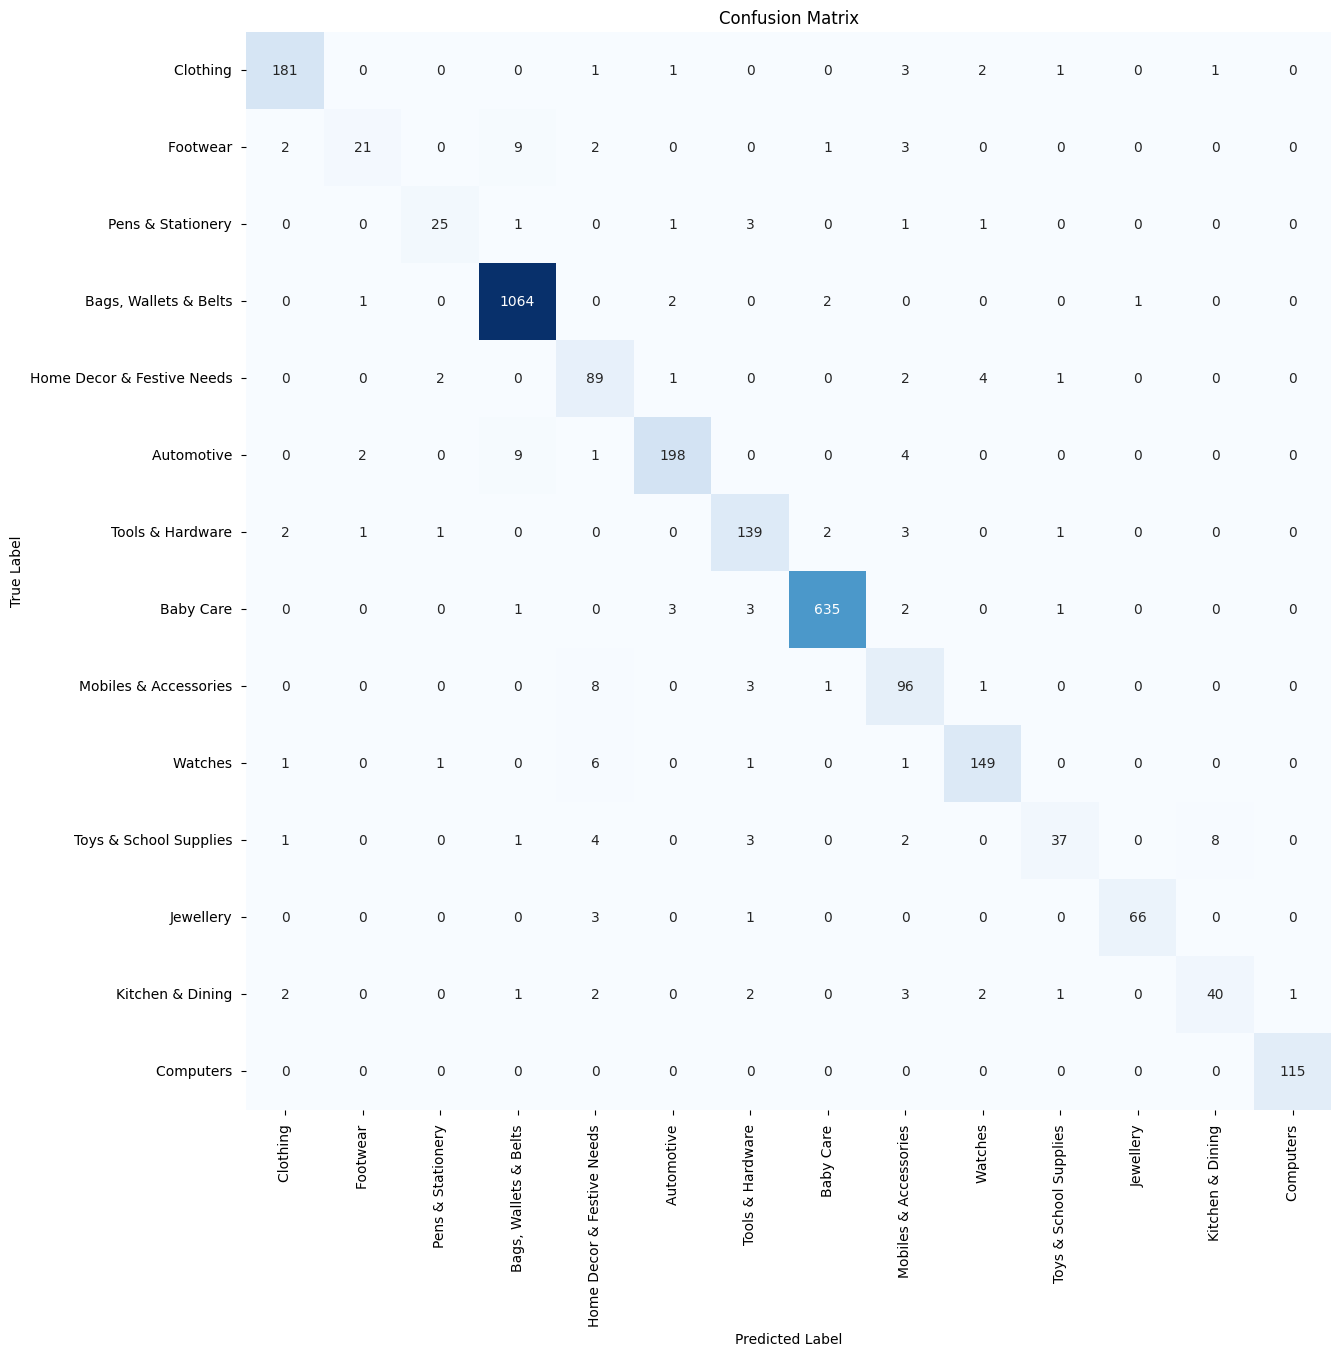

Model evaluation completed.


In [ ]:
# Call the evaluate function
evaluate_model(best_rf, X_train_ft, y_train, X_val_ft, y_val)


Accuracy Prediction on Test Result Data

                            ** E-commerce Product Categorization Performance Analysis**

**Training Set:**
Overall Performance: The model achieved an impressive accuracy of 99% on the training set, demonstrating its strong ability to learn from the training data.

**Precision and Recall:** Most product categories show high precision and recall values, indicating that the model effectively categorizes items without significant misclassifications. This suggests that the model is good at identifying relevant products for each category.

**Performance Balance**: Both macro-average and weighted-average F1-scores are high, reflecting balanced performance across different product categories. This balance is crucial for ensuring that all categories are adequately represented in the predictions.


**Test Set:**
Overall Performance: The model achieved an accuracy of 98% on the test set, which indicates excellent generalization to unseen data. This performance is slightly lower than that of the training set but still demonstrates the model's effectiveness.

**Precision and Recall:** While precision and recall values generally remain high, there are slight variations in certain categories. This variability suggests that the model may struggle slightly with specific classes, indicating room for improvement in categorization accuracy for those products.

**Imbalance:** Certain categories, such as "Pens & Stationery" and "Toys & School Supplies," exhibit lower precision and recall. This could be due to inherent complexities in these categories or class imbalance, where fewer examples are available for training. Addressing this imbalance may improve overall performance.

**Overfitting Analysis:** Comparing the training and test performances reveals a minor drop in performance metrics, which suggests minimal overfitting. The model demonstrates robust generalization capabilities, as evidenced by the close accuracy rates between the training and test sets.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

**Accuracy Prediction on Test Result Data**

In [ ]:
# Load the test results
test_result = pd.read_csv(r"/content/test_results.csv")
print(f"Test result shape: {test_result.shape}")

Test result shape: (2534, 1)


In [ ]:
print(test_result.columns)

Index(['product_category_tree'], dtype='object')


In [ ]:
# Check for null values in the target column
print(test_result.isnull().sum())

product_category_tree    0
dtype: int64


In [ ]:
# Define a function to get FastText embeddings
def get_fasttext_embeddings(texts, model):
    embeddings = [model.get_word_vector(text) for text in texts]
    return np.array(embeddings)

In [ ]:
# Extract FastText features from the test data
X_test_ft = get_fasttext_embeddings(test_result['product_category_tree'], ft_model)

In [ ]:
# Define category mapping
category_mapping = {
    'Clothing ': 0,
    'Footwear ': 1,
    'Pens & Stationery ': 2,
    'Bags, Wallets & Belts ': 3,
    'Home Decor & Festive Needs ': 4,
    'Automotive ': 5,
    'Tools & Hardware ': 6,
    'Baby Care ': 7,
    'Mobiles & Accessories ': 8,
    'Watches ': 9,
    'Toys & School Supplies ': 10,
    'Jewellery ': 11,
    'Kitchen & Dining ': 12,
    'Computers ': 13
}

In [ ]:
# Map the product categories to numerical labels
y_test = test_result['product_category_tree'].map(category_mapping)
y_test = np.array(y_test)

In [ ]:
# Predict using the best model
y_test_pred = best_ridge.predict(X_test_ft)


In [ ]:
#Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.0296


In [ ]:
%matplotlib inline


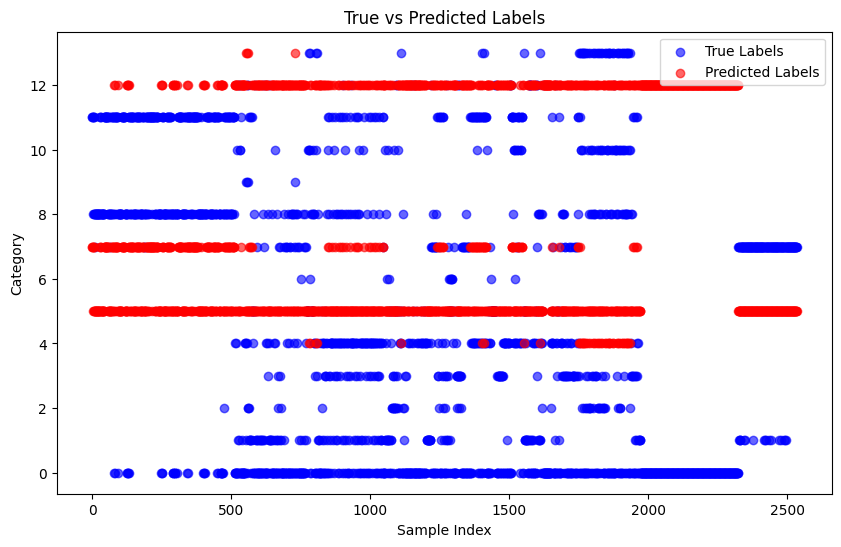

In [ ]:
# Visualize True vs Predicted Labels
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='True Labels', alpha=0.6)
plt.scatter(range(len(y_test_pred)), y_test_pred, color='red', label='Predicted Labels', alpha=0.6)
plt.xlabel('Sample Index')
plt.ylabel('Category')
plt.title('True vs Predicted Labels')
plt.legend()
plt.show()


**Make Predictions using the Deep Learning Model**

Use the trained model to predict the classes of the new data.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.initializers import Constant
import numpy as np
import joblib


In [ ]:
# Tokenize the training text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)  # X_train is your training dataset
sequences = tokenizer.texts_to_sequences(X_train)
word_index = tokenizer.word_index

In [ ]:
# Pad the sequences to ensure uniform input length
max_length = max(len(seq) for seq in sequences)  # Find the maximum sequence length
X_train_padded = pad_sequences(sequences, maxlen=max_length)


In [ ]:
# Load pre-trained word vectors
embedding_dim = 100  # Adjust as necessary
embedding_index = {}
with open(r"/content/test_results.csv", 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        try:
            vector = np.asarray(values[1:], dtype='float32')
            embedding_index[word] = vector
        except ValueError:
            print(f"Error processing line: {line}")


Error processing line: Mobiles & Accessories 

Error processing line: Mobiles & Accessories 

Error processing line: Mobiles & Accessories 

Error processing line: Mobiles & Accessories 

Error processing line: Mobiles & Accessories 

Error processing line: Baby Care 

Error processing line: Mobiles & Accessories 

Error processing line: Mobiles & Accessories 

Error processing line: Mobiles & Accessories 

Error processing line: Mobiles & Accessories 

Error processing line: Mobiles & Accessories 

Error processing line: Mobiles & Accessories 

Error processing line: Mobiles & Accessories 

Error processing line: Mobiles & Accessories 

Error processing line: Mobiles & Accessories 

Error processing line: Mobiles & Accessories 

Error processing line: Mobiles & Accessories 

Error processing line: Mobiles & Accessories 

Error processing line: Mobiles & Accessories 

Error processing line: Mobiles & Accessories 

Error processing line: Mobiles & Accessories 

Error processing line: Mo

In [ ]:
# Tokenize the test data
sequences_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
# Pad the sequences to ensure uniform input length
X_test_padded = pad_sequences(sequences_test, maxlen=max_length)

In [ ]:
# Create the embedding matrix
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1,
                    output_dim=embedding_dim,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=max_length,
                    trainable=False))  # Keep embeddings non-trainable
model.add(LSTM(128))
model.add(Dense(14, activation='softmax'))  # Adjust the output size based on the number of classes

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Import EarlyStopping for monitoring the validation loss during training
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#Define early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)


In [ ]:
#Train the model with training data and validation data
history = model.fit(X_train_padded,  # Padded training sequences
                    y_train,         # Training labels
                    epochs=5,        # Number of epochs for training
                    batch_size=32,   # Batch size for training
                    validation_data=(X_test_padded, y_test),  # Validation data
                    callbacks=[early_stopping])  # Early stopping callback


Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 28s 67ms/step - accuracy: 0.3482 - loss: 2.1527 - val_accuracy: 0.0422 - val_loss: 2.8664
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 25s 66ms/step - accuracy: 0.3498 - loss: 2.0844 - val_accuracy: 0.0422 - val_loss: 2.9533
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 71ms/step - accuracy: 0.3549 - loss: 2.0720 - val_accuracy: 0.0422 - val_loss: 3.0219


In [ ]:
# Generate predictions on the test data
y_pred = np.argmax(model.predict(X_test_padded), axis=1)

80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step


In [ ]:
# Display accuracy score and classification report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print("==== *****   CLASSIFICATION REPORT **** ======")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy: 0.04
==== *****   CLASSIFICATION REPORT **** ======
                             precision    recall  f1-score   support

                Automotive        0.00      0.00      0.00       882
                 Baby Care        0.00      0.00      0.00       144
     Bags, Wallets & Belts        0.00      0.00      0.00        49
                  Clothing        0.04      1.00      0.08       107
                 Computers        0.00      0.00      0.00       215
                  Footwear        0.00      0.00      0.00        75
Home Decor & Festive Needs        0.00      0.00      0.00        12
                 Jewellery        0.00      0.00      0.00       259
          Kitchen & Dining        0.00      0.00      0.00       331
     Mobiles & Accessories        0.00      0.00      0.00         4
         Pens & Stationery        0.00      0.00      0.00        59
          Tools & Hardware        0.00      0.00      0.00       313
    Toys & School Supplies        0.00  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Visualize confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt


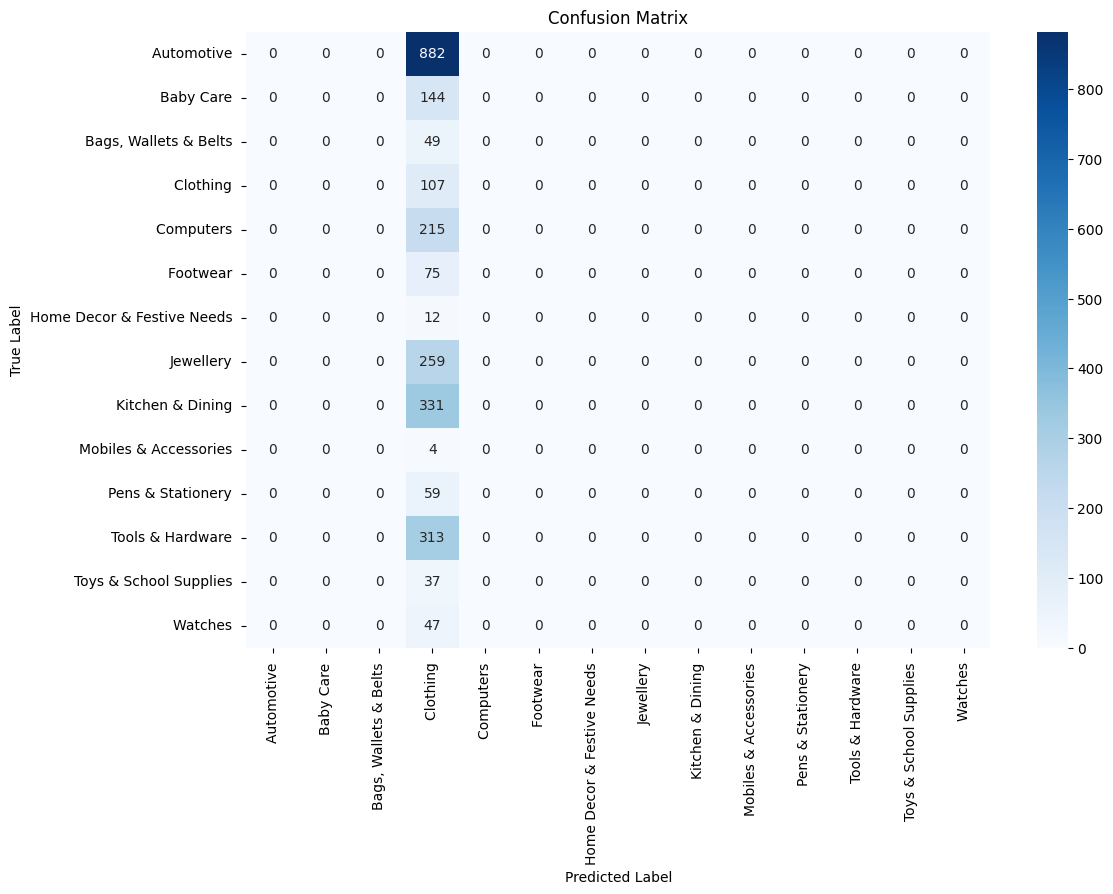

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Conclusion**
After evaluating multiple machine learning models for the task of e-commerce product categorization, we found the following results:

**Machine Learning Models:**

**XGBoost:**
Training Accuracy: 0.994500
Validation Accuracy: 0.953667

**Random Forest:**
Training Accuracy: 0.994500
Validation Accuracy: 0.952667

**Decision Tree:**
Training Accuracy: 0.994500
Validation Accuracy: 0.928667

**Linear SVM:**
Training Accuracy: 0.906076
Validation Accuracy: 0.897333

**Ridge Classifier:**
Training Accuracy: 0.891824
Validation Accuracy: 0.884333

**SGD Classifier:**
Training Accuracy: 0.888741
Validation Accuracy: 0.882667

**KNN Classifier:**
Training Accuracy: 0.880990
Validation Accuracy: 0.871667

**AdaBoost:**
Training Accuracy: 0.614135
Validation Accuracy: 0.618667

**Key Findings:**
The XGBoost and Random Forest models achieved the highest training accuracy of 99.45%, while both demonstrated strong validation accuracies of 95.37% and 95.27%, respectively.
The Decision Tree also performed well, matching the training accuracy of the top models but exhibiting a slightly lower validation accuracy (92.87%).
The Linear SVM produced a training accuracy of 90.61% with a validation accuracy of 89.73%, indicating decent performance but not on par with the top-performing models.
Ridge Classifier and SGD Classifier showed lower performance, with validation accuracies around 88.43% and 88.27%.
The KNN Classifier and AdaBoost models performed the lowest, with KNN showing validation accuracy at 87.17% and AdaBoost significantly lower at 61.87%.


**Final Conclusion:**
Based on the analysis, the XGBoost and Random Forest classifiers are recommended for the task of e-commerce product categorization due to their superior validation performance and robustness. These models demonstrate a strong balance of training and validation accuracies, making them suitable choices for deployment on the current dataset and feature engineering process.

In [ ]:
import fasttext

# Assuming you have already trained your FastText model
model = fasttext.train_supervised('/content/fasttext_train.txt')
# Save the FastText model
model.save_model('ft_model.bin')


In [ ]:
import fasttext

# Load the FastText model
loaded_model = fasttext.load_model('ft_model.bin')

# Use the loaded model to predict
labels, probabilities = loaded_model.predict(["Your text to classify here"])
print(f'Predicted label: {labels[0]}, Probability: {probabilities[0]}')


Predicted label: ['__label__4'], Probability: [0.3884802]


**Deployment**

In [ ]:
import pickle
import joblib

# Save the trained model using pickle
model.save_model('text_classification_model.bin')

# Save the best Ridge model using joblib
joblib.dump(best_ridge, 'best_ridge_model.pkl')

# If you don't have a TF-IDF vectorizer to save, you can remove that line entirely


['best_ridge_model.pkl']